In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## K-Means Clustering

In [2]:
# read in data
data = pd.read_csv('diamonds.csv')

In [3]:
# perform EDA 
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
# subset data into feature set 
sub_diamond = data[['carat','depth','table','price','x','y','z']]
sub_diamond

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
sub_diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# convert dataframe into numpy array (matrix)
sub_diamond_arr = sub_diamond.to_numpy()

[Difference between dataframes and numpy arrays](https://www.askpython.com/python/pandas-dataframe-vs-numpy-arrays)

[Why convert dataframes to numpy arrays?](https://vitalflux.com/pandas-dataframe-vs-numpy-array-what-to-use/)

In [8]:
# scale data 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(sub_diamond_arr)

## Clustering Data

In [9]:
kmeans = KMeans(
        init="random", 
        n_clusters=5, #number of clusters to group data into 
        n_init=10, #number of initializations to perform
        max_iter=100, # max number of iterations through algorithm
        random_state=1
)

In [10]:
kmeans.fit(scaled_features)
print("Lowest SSE: ", kmeans.inertia_)
print("Final Locations of Centroids: \n", kmeans.cluster_centers_)
print("Number of iterations performed before convergence: ", kmeans.n_iter_)

Lowest SSE:  113178.4138367495
Final Locations of Centroids: 
 [[-0.83152918  0.24336126 -0.69095644 -0.71562654 -0.91144684 -0.8881135
  -0.86706715]
 [ 1.95739692  0.0433946   0.21240894  2.10979891  1.7139829   1.68135933
   1.68698769]
 [ 0.38449564 -1.20553483  1.20984696  0.17272523  0.60177123  0.58010741
   0.42929294]
 [-0.84013735 -0.659538    0.80058521 -0.72711207 -0.90580492 -0.88942138
  -0.95744347]
 [ 0.33300578  0.49878104 -0.19989188  0.17209556  0.46842254  0.45742858
   0.52269476]]
Number of iterations performed before convergence:  24


In [11]:
# print cluster assignments
kmeans.labels_[:100]

array([0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0,
       0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4])

## Using Elbow Method to choose appropriate number of clusters

At some point, the SSE curve starts to bend known as the **elbow point**. This point is thought to be a reasonable tradeoff between error and number of clusters.

In [12]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,
                   init="random",
                   n_init=10,
                   random_state=1
                   )
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

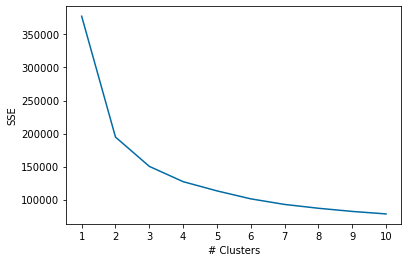

In [13]:
plt.style.use("tableau-colorblind10")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("# Clusters")
plt.ylabel("SSE")
plt.show()

In [22]:
# identify point of greatest curvature
opt_clusters = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing").elbow
print("Optimal number of clusters: ", opt_clusters)

Optimal number of clusters:  3


## Using Silhouette Method to choose appropriate number of clusters

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

1. How close the data point is to other points in the cluster
2. How far away the data point is from points in other clusters

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,
                    init="random",
                    n_init=10,
                    random_state=1
                   )
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
plt.style.use("tableau-colorblind10")
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("# Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Principle Component Analysis

[Principal Component Analysis PCA Explained](https://www.geeksforgeeks.org/principal-component-analysis-with-python/)

In [67]:
# fit model with optimal number of clusters
clusters = KMeans(n_clusters=opt_clusters,
                   init="random",
                   n_init=10,
                   random_state=1
                   ).fit_predict(scaled_features)

In [71]:
pca = PCA(opt_clusters-1)
df = pca.fit_transform(sub_diamond)
cluster0 = df[clusters == 0]
cluster1 = df[clusters == 1]
cluster2 = df[clusters == 2]

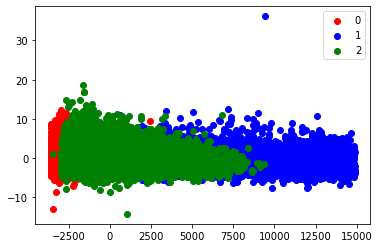

In [83]:
# visualize clusters
plt.scatter(cluster0[:,0], cluster0[:,1] , color = 'red', label = 0)
plt.scatter(cluster1[:,0],cluster1[:,1], color = 'blue' ,label = 1)
plt.scatter(cluster2[:,0],cluster2[:,1], color = 'green', label = 2)
plt.legend()
plt.show()